# Problem 1
    
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score



## 1.1 Reading data ,exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [2]:
df_clustering = pd.read_csv("bank_marketing_part1_Data.csv")

# Checking the data

In [3]:
df_clustering.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df_clustering.shape

(210, 7)

In [5]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
df_clustering.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [7]:
df_clustering.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


## Check for duplicates

In [8]:
dups = df_clustering.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


C:\Users\Issac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'spending'}, xlabel='spending'>

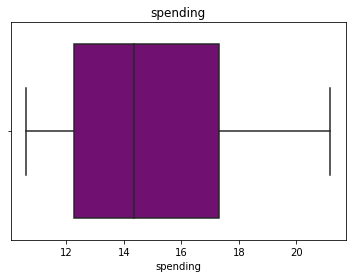

In [9]:
plt.title('spending')
sns.boxplot(df_clustering['spending'],orient='horizondal',color='purple')

C:\Users\Issac\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Issac\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


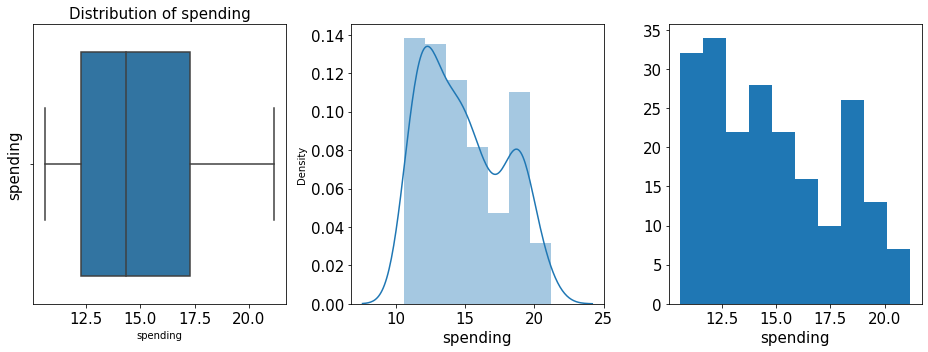

In [10]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='spending',data=df_clustering,orient='v',ax=ax1)
ax1.set_ylabel('spending', fontsize=15)
ax1.set_title('Distribution of spending', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df_clustering['spending'],ax=ax2)
ax2.set_xlabel('spending', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df_clustering['spending'])
ax3.set_xlabel('spending', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

C:\Users\Issac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'advance_payments'}, xlabel='advance_payments'>

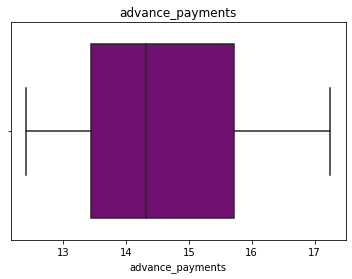

In [11]:
plt.title('advance_payments')
sns.boxplot(df_clustering['advance_payments'],orient='horizondal',color='purple')

In [12]:
sns.boxplot(x='advance_payments',data=df_clustering,orient='v',ax=ax1)
ax1.set_ylabel('advance_payments', fontsize=15)
ax1.set_title('Distribution of advance_payments', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df_clustering['advance_payments'],ax=ax2)
ax2.set_xlabel('advance_payments', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist((df_clustering['advance_payments'])
ax3.set_xlabel('advance_payments', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

SyntaxError: invalid syntax (<ipython-input-12-f0cc67c43ccc>, line 13)

C:\Users\Issac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'probability_of_full_payment'}, xlabel='probability_of_full_payment'>

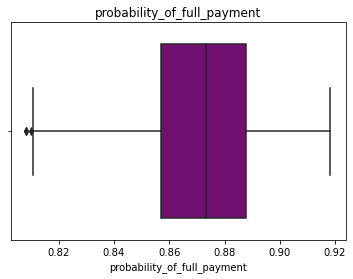

In [13]:
plt.title('probability_of_full_payment')
sns.boxplot(df_clustering['probability_of_full_payment'],orient='horizondal',color='purple')

C:\Users\Issac\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Issac\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


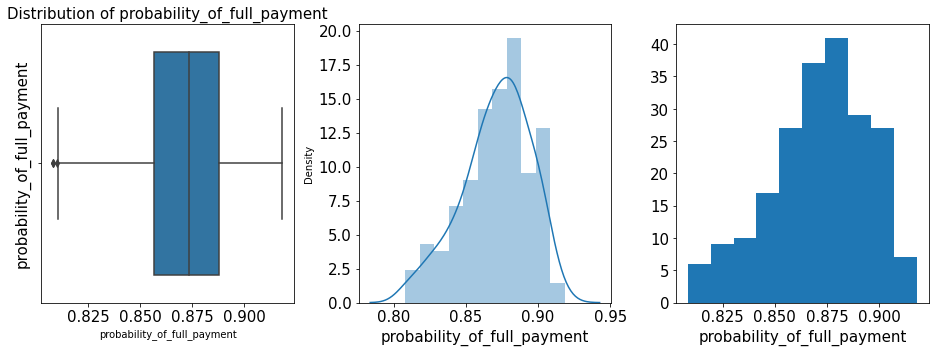

In [14]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='probability_of_full_payment',data=df_clustering,orient='v',ax=ax1)
ax1.set_ylabel('probability_of_full_payment', fontsize=15)
ax1.set_title('Distribution of probability_of_full_payment', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df_clustering['probability_of_full_payment'],ax=ax2)
ax2.set_xlabel('probability_of_full_payment', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df_clustering['probability_of_full_payment'])
ax3.set_xlabel('probability_of_full_payment', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

C:\Users\Issac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'current_balance'}, xlabel='current_balance'>

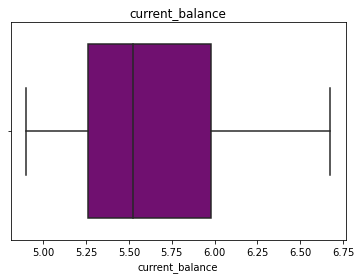

In [15]:
plt.title('current_balance')
sns.boxplot(df_clustering['current_balance'],orient='horizondal',color='purple')

C:\Users\Issac\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Issac\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


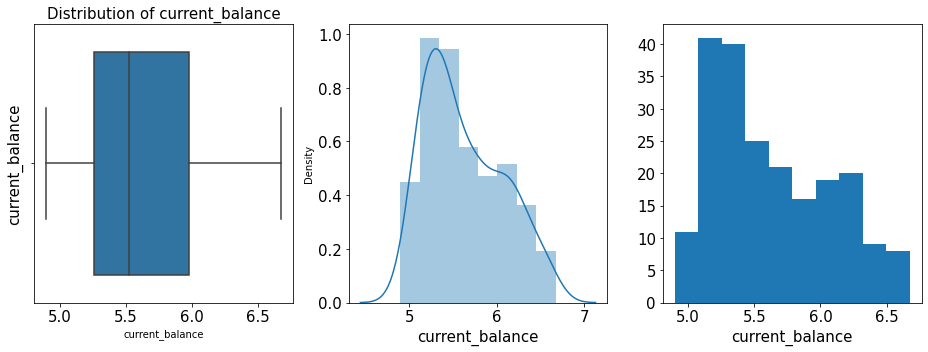

In [16]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='current_balance',data=df_clustering,orient='v',ax=ax1)
ax1.set_ylabel('current_balance', fontsize=15)
ax1.set_title('Distribution of current_balance', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df_clustering['current_balance'],ax=ax2)
ax2.set_xlabel('current_balance', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df_clustering['current_balance'])
ax3.set_xlabel('current_balance', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

C:\Users\Issac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'credit_limit'}, xlabel='credit_limit'>

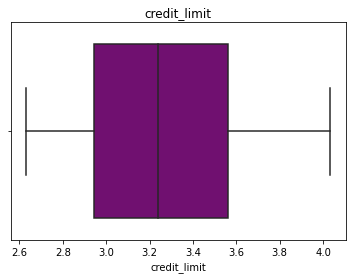

In [17]:
plt.title('credit_limit')
sns.boxplot(df_clustering['credit_limit'],orient='horizondal',color='purple')

C:\Users\Issac\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Issac\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


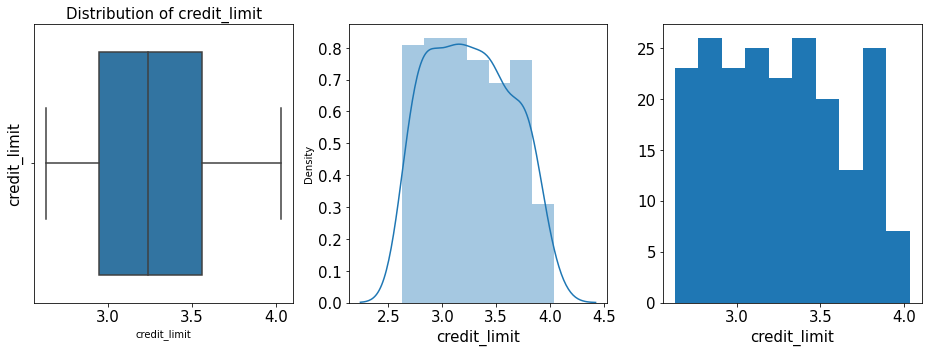

In [18]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='credit_limit',data=df_clustering,orient='v',ax=ax1)
ax1.set_ylabel('credit_limit', fontsize=15)
ax1.set_title('Distribution of credit_limit', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df_clustering['credit_limit'],ax=ax2)
ax2.set_xlabel('credit_limit', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df_clustering['credit_limit'])
ax3.set_xlabel('credit_limit', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

C:\Users\Issac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'min_payment_amt'}, xlabel='min_payment_amt'>

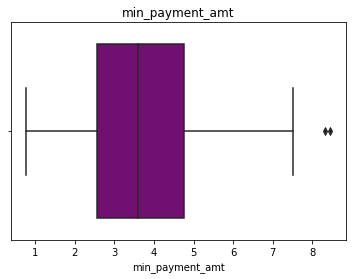

In [19]:
plt.title('min_payment_amt')
sns.boxplot(df_clustering['min_payment_amt'],orient='horizondal',color='purple')

C:\Users\Issac\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Issac\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


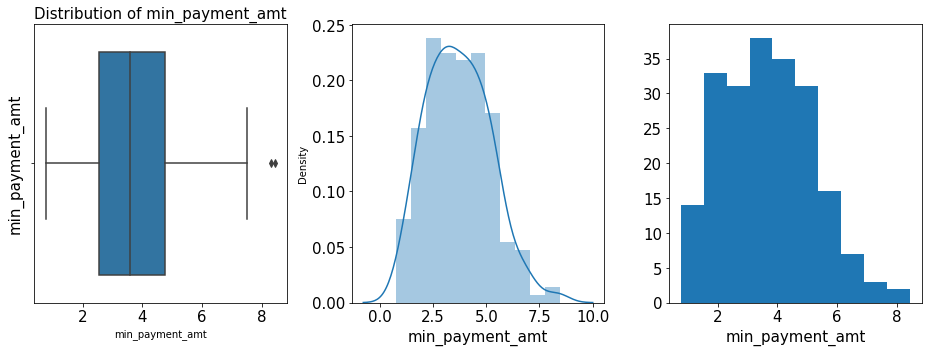

In [20]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='min_payment_amt',data=df_clustering,orient='v',ax=ax1)
ax1.set_ylabel('min_payment_amt', fontsize=15)
ax1.set_title('Distribution of min_payment_amt', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df_clustering['min_payment_amt'],ax=ax2)
ax2.set_xlabel('min_payment_amt', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df_clustering['min_payment_amt'])
ax3.set_xlabel('min_payment_amt', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

C:\Users\Issac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'max_spent_in_single_shopping'}, xlabel='max_spent_in_single_shopping'>

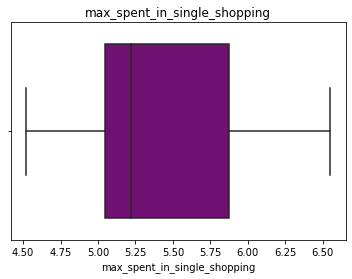

In [21]:
plt.title('max_spent_in_single_shopping')
sns.boxplot(df_clustering['max_spent_in_single_shopping'],orient='horizondal',color='purple')

C:\Users\Issac\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Issac\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


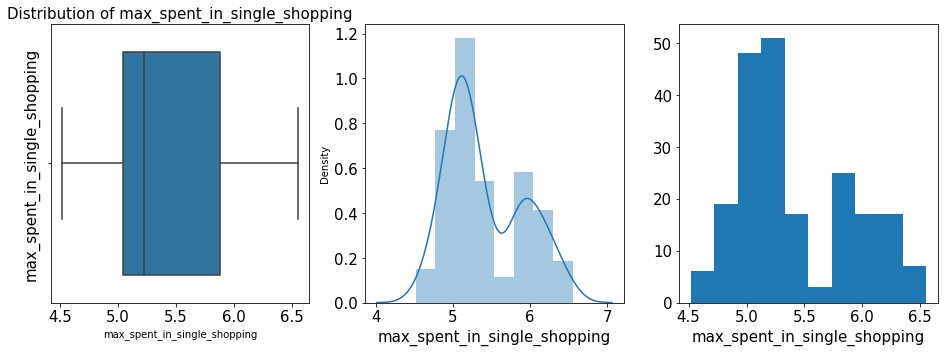

In [22]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='max_spent_in_single_shopping',data=df_clustering,orient='v',ax=ax1)
ax1.set_ylabel('max_spent_in_single_shopping', fontsize=15)
ax1.set_title('Distribution of max_spent_in_single_shopping', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df_clustering['max_spent_in_single_shopping'],ax=ax2)
ax2.set_xlabel('max_spent_in_single_shopping', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df_clustering['max_spent_in_single_shopping'])
ax3.set_xlabel('max_spent_in_single_shopping', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

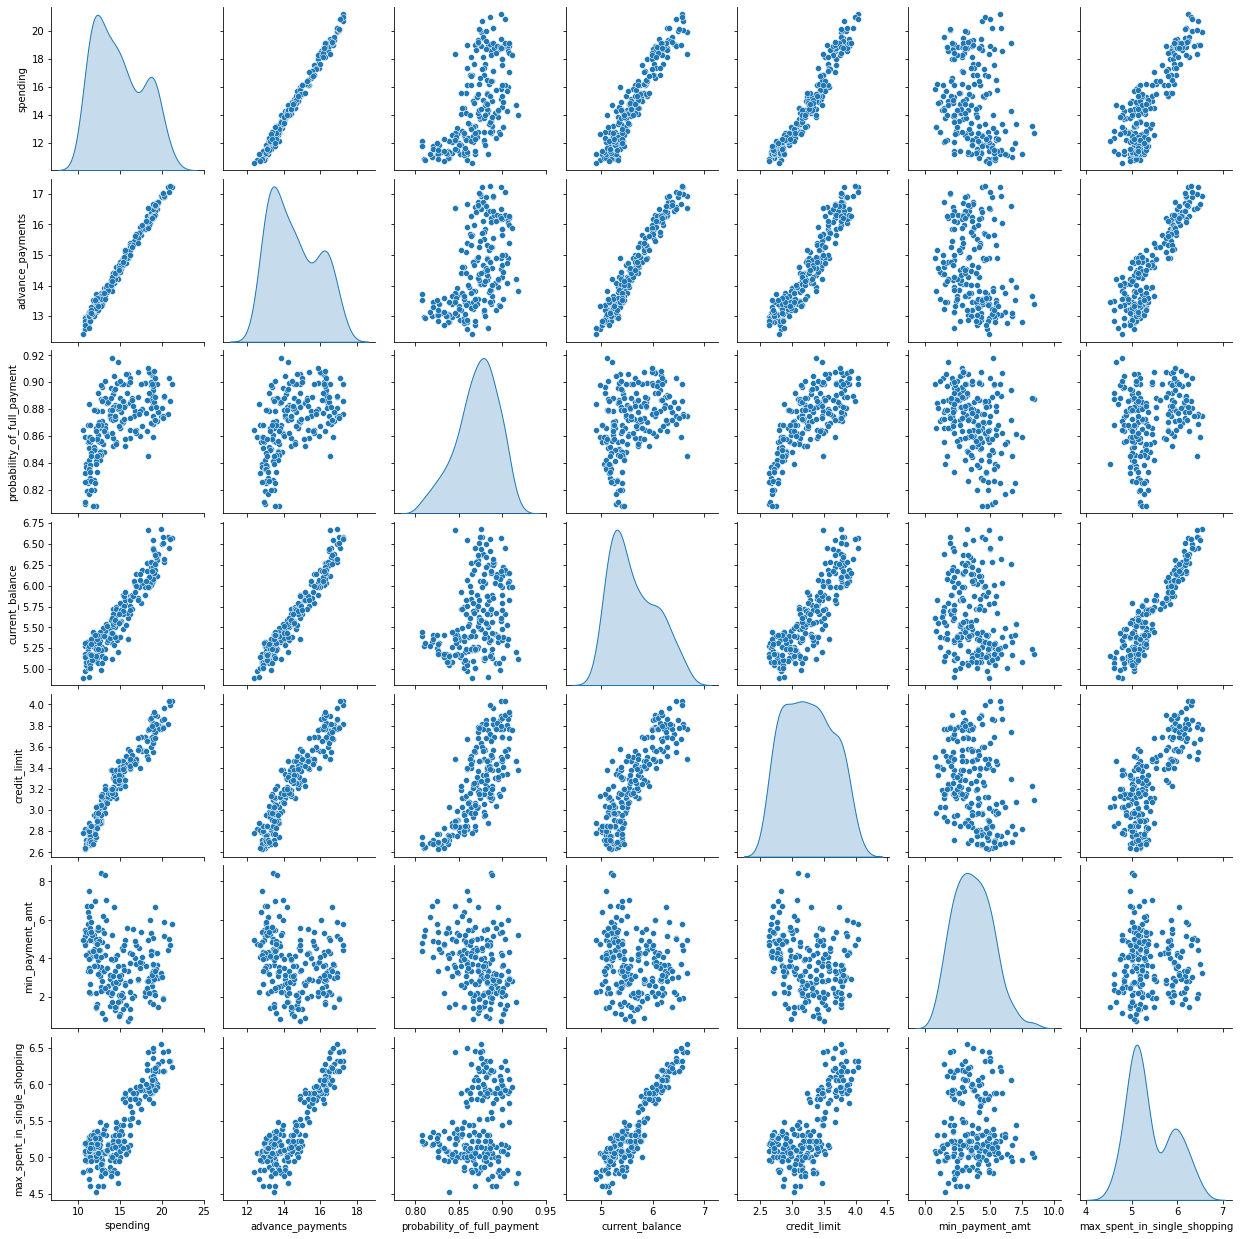

In [23]:
sns.pairplot(df_clustering,diag_kind='kde');

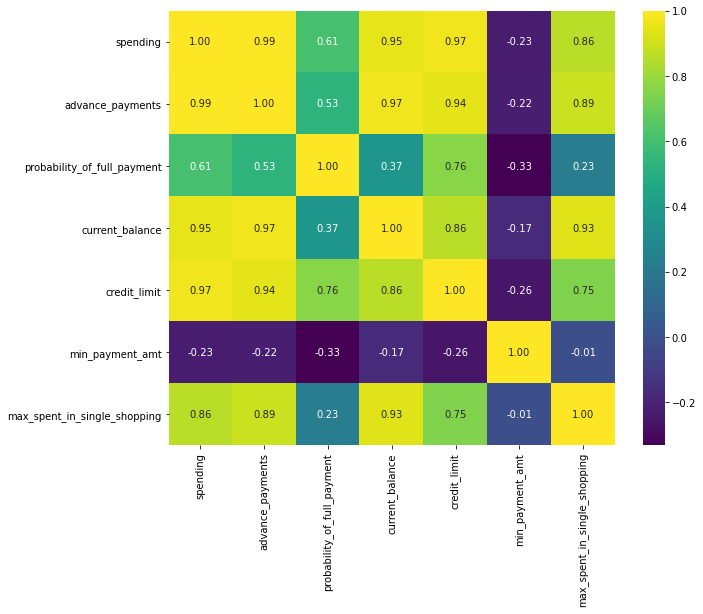

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df_clustering.corr(),annot=True,fmt=".2f",cmap="viridis")
plt.show()

# Scaling the data

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
X = StandardScaler()

In [28]:
scaled_clustering = pd.DataFrame(X.fit_transform(df_clustering), columns=df_clustering.columns)

In [33]:
scaled_clustering.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


# Hierarchial clustering

In [29]:
from scipy.cluster.hierarchy import dendrogram,linkage 


In [30]:
wardlink=linkage(scaled_clustering, method ='ward')

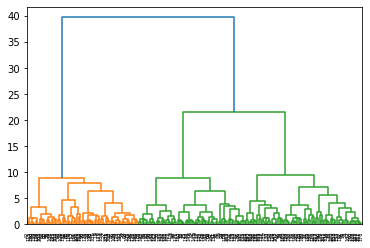

In [31]:
dend=dendrogram(wardlink)

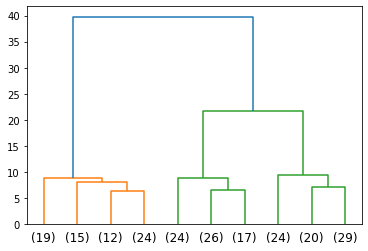

In [32]:
dend=dendrogram(wardlink,truncate_mode='lastp',p=10.)

In [34]:
from scipy.cluster.hierarchy import fcluster

In [35]:
link_method = linkage(scaled_clustering, method = 'average')

In [36]:
clusters_ward = fcluster(wardlink,3,criterion='maxclust')

In [41]:
clusters_ward

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [37]:
df_clustering['cluster_ward'] = clusters_ward


In [43]:
df_clustering.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_ward
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [39]:
df_clustering['cluster_ward'].value_counts().sort_index()

1    70
2    67
3    73
Name: cluster_ward, dtype: int64

In [42]:
aggdata=df_clustering.groupby('cluster_ward').mean()
aggdata['Freq']=df_clustering.cluster_ward.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
cluster_ward,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73



# Kmeans clustering

In [43]:
df_clustering.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_ward
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [44]:
k_means = KMeans(n_clusters = 2,random_state=1)

In [45]:
k_means.fit(scaled_clustering)

KMeans(n_clusters=2, random_state=1)

# Cluster Output for all the observations

In [46]:
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

# Calculating WSS 

In [47]:
wss =[]

In [48]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_clustering)
    wss.append(KM.inertia_)


In [49]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.38509060801107,
 327.2127816566134,
 289.315995389595,
 262.98186570162267,
 241.8189465608603,
 223.91254221002728,
 206.3961218478669]

In [50]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_clustering)
labels = k_means.labels_

In [51]:
silhouette_score(scaled_clustering,labels,random_state=1)

0.40072705527512986

In [52]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_clustering)
labels = k_means.labels_

In [53]:
silhouette_score(scaled_clustering,labels,random_state=1)

0.3276547677266192

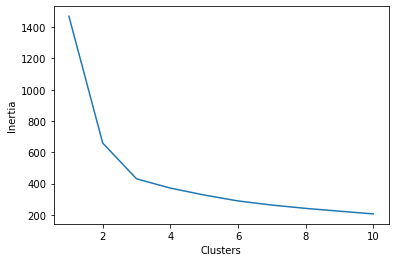

In [54]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.show()